**Configuración del entorno virtual**
Para asegurar la reproducibilidad del proyecto y evitar conflictos entre dependencias, se creó previamente un entorno virtual con las librerías necesarias.

Las dependencias se registraron en un archivo requirements.txt que incluye, entre otras:
import pandas as pd
import geopandas as gpd
from rapidfuzz import process, fuzz
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

Este archivo permite instalar automáticamente todos los paquetes necesarios.

In [4]:
import pandas as pd
import geopandas as gpd
from rapidfuzz import process, fuzz
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import mannwhitneyu
from shapely.geometry import Point
from scipy.stats import pearsonr



Antes de proceder con el análisis, es fundamental realizar una limpieza rigurosa del conjunto de datos. Esta etapa garantiza la calidad, la coherencia y la fiabilidad de los resultados obtenidos.

### Objetivos de la limpieza:
- Eliminar valores nulos o duplicados.
- Corregir errores tipográficos y de codificación.
- Estandarizar nombres de variables y formatos.
- Transformar columnas si es necesario (por ejemplo, separar campos combinados).
- Filtrar registros irrelevantes o inconsistentes.

Comenzamos entonces con la preparación del dataset para asegurar un análisis preciso y significativo.


In [30]:
pl_clean= pd.read_csv('/Users/pm/Desktop/Punto Limpio Python/Data/puntos_limpios_clean', sep=";")
pl_clean["distrito"] = pl_clean["distrito"].replace("VICALVARO", "VICÁLVARO")
pl_clean.head()

,pk,nombre,transporte,descripcion,nombre_via,clase_vial,num,orientacion,codigo_postal,cod_barrio,barrio,cod_distrito,distrito,coordenada_x,coordenada_y,latitud,longitud
0,19960,Punto Limpio Fijo del Ayuntamiento de Madrid. ...,"Metro: Méndez Álvaro (línea 6)Bus: 148, 102, 152",El traslado de residuos correrá a cuenta de la...,ESTRELLA DENEBOLA,CALLE,5,NaN,28045,5.0,DELICIAS,2.0,ARGANZUELA,442110,4471943,40.394199,-3.683421
1,138166,Punto Limpio Fijo del Ayuntamiento de Madrid. ...,"Metro: Barajas (línea 8)Bus: 105 , 115",El traslado de residuos correrá a cuenta de la...,ALHAURIN,CALLE,5,NaN,28042,4.0,TIMON,21.0,BARAJAS,450367,4480523,40.473908,-3.585535
2,135224,Punto Limpio Fijo del Ayuntamiento de Madrid. ...,"Bus: 47 , 108 , 118",El traslado de residuos correrá a cuenta de la...,CIDRO,CALLE,5,NaN,28044,6.0,BUENAVISTA,11.0,CARABANCHEL,436678,4468888,40.368155,-3.745855
3,13893,Punto Limpio Fijo del Ayuntamiento de Madrid. ...,"Bus: 7 , 11 , 40 , 52",El traslado de residuos correrá a cuenta de la...,ALFONSO XIII,AVENIDA,128,ENTRADA JUNTO GASOLINERA,28016,4.0,HISPANOAMERICA,5.0,CHAMARTIN,443493,4478903,40.458875,-3.666467
4,43200,Punto Limpio Fijo del Ayuntamiento de Madrid. ...,"Bus: 70 , 106",El traslado de residuos correrá a cuenta de la...,DAROCA,AVENIDA,104,JUNTO AL CEMENTERIO DE LA ALMUDENA,28032,1.0,VENTAS,15.0,CIUDAD LINEAL,446583,4474581,40.418263,-3.630928


## 🗂️ Extracción de los Distritos con Punto Limpio

Una vez realizada la limpieza inicial del dataset, procedemos a identificar los **distritos de Madrid que cuentan con al menos un Punto Limpio**.

### Objetivo:
Obtener una lista única de distritos donde está presente esta infraestructura fija de reciclaje, lo cual permitirá analizar su distribución territorial y cruzarla con variables socioeconómicas.


In [6]:
pl_clean["distrito"]

0              ARGANZUELA
1                 BARAJAS
2             CARABANCHEL
3               CHAMARTIN
4           CIUDAD LINEAL
5     FUENCARRAL-EL PARDO
6               HORTALEZA
7                  LATINA
8         MONCLOA-ARAVACA
9               MORATALAZ
10     PUENTE DE VALLECAS
11    SAN BLAS-CANILLEJAS
12                  USERA
13              VICÁLVARO
14      VILLA DE VALLECAS
15             VILLAVERDE
Name: distrito, dtype: object

## 💶 Preparación del Dataset de Renta Media por Distrito

Realizamos un preprocesamiento exhaustivo del fichero `renta_media_distrito.csv` con el objetivo de obtener una tabla limpia y útil para el análisis territorial.


In [32]:
df_renta = pd.read_csv("../Data/renta_media_distrito.csv", sep=";", thousands='.', decimal=',')
df_renta = df_renta.copy()

In [35]:
df_renta.head(22)

,Municipios,Distritos,Secciones,Indicadores de renta media y mediana,Periodo,Total
0,28079 Madrid,NaN,NaN,Renta neta media por persona,2022,18632
1,28079 Madrid,2807901 Madrid distrito 01,NaN,Renta neta media por persona,2022,20587
2,28079 Madrid,2807902 Madrid distrito 02,NaN,Renta neta media por persona,2022,21383
3,28079 Madrid,2807903 Madrid distrito 03,NaN,Renta neta media por persona,2022,25407
4,28079 Madrid,2807904 Madrid distrito 04,NaN,Renta neta media por persona,2022,28140
5,28079 Madrid,2807905 Madrid distrito 05,NaN,Renta neta media por persona,2022,30506
6,28079 Madrid,2807906 Madrid distrito 06,NaN,Renta neta media por persona,2022,18062
7,28079 Madrid,2807907 Madrid distrito 07,NaN,Renta neta media por persona,2022,27076
8,28079 Madrid,2807908 Madrid distrito 08,NaN,Renta neta media por persona,2022,21947
9,28079 Madrid,2807909 Madrid distrito 09,NaN,Renta neta media por persona,2022,26694


In [36]:
df_renta.columns

Index(['Municipios', 'Distritos', 'Secciones',
       'Indicadores de renta media y mediana', 'Periodo', 'Total'],
      dtype='object')

In [38]:
df_renta['Total'] = (
    df_renta['Total']
    .astype(str)              
    .str.replace(".", "", regex=False) 
    .astype(int)              
)

In [40]:
df_renta["Total"].dtype

dtype('int64')

In [41]:
distrito_map = {
    1: "CENTRO",
    2: "ARGANZUELA",
    3: "RETIRO",
    4: "SALAMANCA",
    5: "CHAMARTÍN",
    6: "TETUÁN",
    7: "CHAMBERÍ",
    8: "FUENCARRAL-EL PARDO",
    9: "MONCLOA-ARAVACA",
    10: "LATINA",
    11: "CARABANCHEL",
    12: "USERA",
    13: "PUENTE DE VALLECAS",
    14: "MORATALAZ",
    15: "CIUDAD LINEAL",
    16: "HORTALEZA",
    17: "VILLAVERDE",
    18: "VILLA DE VALLECAS",
    19: "VICÁLVARO",
    20: "SAN BLAS-CANILLEJAS",
    21: "BARAJAS"
}

In [42]:
df_renta.sample(12)

,Municipios,Distritos,Secciones,Indicadores de renta media y mediana,Periodo,Total
12,28079 Madrid,2807912 Madrid distrito 12,NaN,Renta neta media por persona,2022,11430
15,28079 Madrid,2807915 Madrid distrito 15,NaN,Renta neta media por persona,2022,17808
21,28079 Madrid,2807921 Madrid distrito 21,NaN,Renta neta media por persona,2022,20788
7,28079 Madrid,2807907 Madrid distrito 07,NaN,Renta neta media por persona,2022,27076
10,28079 Madrid,2807910 Madrid distrito 10,NaN,Renta neta media por persona,2022,14375
16,28079 Madrid,2807916 Madrid distrito 16,NaN,Renta neta media por persona,2022,21766
18,28079 Madrid,2807918 Madrid distrito 18,NaN,Renta neta media por persona,2022,14274
8,28079 Madrid,2807908 Madrid distrito 08,NaN,Renta neta media por persona,2022,21947
4,28079 Madrid,2807904 Madrid distrito 04,NaN,Renta neta media por persona,2022,28140
1,28079 Madrid,2807901 Madrid distrito 01,NaN,Renta neta media por persona,2022,20587


In [54]:

df_renta = pd.read_csv("../Data/renta_media_distrito.csv", sep=";", thousands='.', decimal=',')

#Limpieza de datos
df_renta.columns = df_renta.columns.str.strip().str.lower().str.replace(" ", "_")

# #limpieza de los montos de renta
# df_renta["total"] = (
#     df_renta["total"]
#     .astype(str)
#     .str.replace(".", "", regex=False)
#     .astype(float)
# )
df_renta.drop(index=0, inplace=True)

df_renta["cod_distrito_num"] = df_renta["distritos"].str.extract(r'distrito\s+(\d+)$')[0].astype(float)
df_renta.drop(columns=["municipios", "secciones", "indicadores_de_renta_media_y_mediana", "distritos"], inplace = True, errors="ignore")

distrito_map = {
    1: "CENTRO",
    2: "ARGANZUELA",
    3: "RETIRO",
    4: "SALAMANCA",
    5: "CHAMARTÍN",
    6: "TETUÁN",
    7: "CHAMBERÍ",
    8: "FUENCARRAL-EL PARDO",
    9: "MONCLOA-ARAVACA",
    10: "LATINA",
    11: "CARABANCHEL",
    12: "USERA",
    13: "PUENTE DE VALLECAS",
    14: "MORATALAZ",
    15: "CIUDAD LINEAL",
    16: "HORTALEZA",
    17: "VILLAVERDE",
    18: "VILLA DE VALLECAS",
    19: "VICÁLVARO",
    20: "SAN BLAS-CANILLEJAS",
    21: "BARAJAS"
}
df_renta["distrito_name"] = df_renta["cod_distrito_num"].map(distrito_map)
df_renta_limpio = (
    df_renta[["distrito_name", "total"]]
    .dropna()
    .rename(columns={"distrito_name": "distrito", "total": "renta_media"})
)

df_renta = df_renta[["cod_distrito_num", "distrito_name", "periodo", "total"]]

df_renta = df_renta.rename(columns={"cod_distrito_num": "cod_distrito", "distrito_name": "distrito", "total": "total renta media"})



In [50]:
df_renta.columns

Index(['cod_distrito', 'distrito', 'periodo', 'total renta media'], dtype='object')

#Donde no hay Punto Limpio Fijo?
## 🕵️‍♀️ Identificación de Distritos sin Punto Limpio Fijo

La identificación de los distritos de Madrid sin Punto Limpio fijo es una parte clave del análisis, ya que permite contrastar las hipótesis 1 y 3 relacionadas con el acceso equitativo y el posible sesgo territorial en la distribución de estas infraestructuras.

In [18]:

distritos_madrid = set(df_renta["distrito"].str.upper().str.strip().unique())
distritos_pl = set(pl_clean["distrito"].str.upper().str.strip().unique())

distritos_sin_pl = distritos_madrid - distritos_pl
display(distritos_sin_pl)



{'CENTRO', 'CHAMARTÍN', 'CHAMBERÍ', 'RETIRO', 'SALAMANCA', 'TETUÁN'}

### 🧭 Interpretación preliminar

Esta lista ofrece una primera aproximación a lo que podría ser el resultado de la verificación de la distribución territorial de los Puntos Limpios.

Los distritos identificados **se concentran en el centro de Madrid** y, en su mayoría, son barrios con **niveles de vida elevados** —con la excepción de **Tetuán**, que presenta características socioeconómicas más diversas.

### ✅ Etiquetado de distritos según la presencia de Punto Limpio Fijo

Para facilitar el análisis comparativo, se ha añadido una nueva columna al dataset de renta (`df_renta`) que indica si cada distrito cuenta o no con un **Punto Limpio fijo**.

In [55]:

df_renta["punto_limpio_fijo"]= df_renta["distrito"].str.upper().str.strip().apply(
    lambda d: "Si" if d in distritos_pl else "No")

display (df_renta)

,cod_distrito,distrito,periodo,total renta media,punto_limpio_fijo
1,1.0,CENTRO,2022,20587,No
2,2.0,ARGANZUELA,2022,21383,Si
3,3.0,RETIRO,2022,25407,No
4,4.0,SALAMANCA,2022,28140,No
5,5.0,CHAMARTÍN,2022,30506,No
6,6.0,TETUÁN,2022,18062,No
7,7.0,CHAMBERÍ,2022,27076,No
8,8.0,FUENCARRAL-EL PARDO,2022,21947,Si
9,9.0,MONCLOA-ARAVACA,2022,26694,Si
10,10.0,LATINA,2022,14375,Si


In [46]:
df_renta.columns

Index(['cod_distrito', 'distrito', 'periodo', 'total renta media',
       'punto_limpio_fijo'],
      dtype='object')

In [56]:
df_distritos_sorted = df_renta.sort_values(by="total renta media", ascending=False)
display(df_distritos_sorted)

,cod_distrito,distrito,periodo,total renta media,punto_limpio_fijo
5,5.0,CHAMARTÍN,2022,30506,No
4,4.0,SALAMANCA,2022,28140,No
7,7.0,CHAMBERÍ,2022,27076,No
9,9.0,MONCLOA-ARAVACA,2022,26694,Si
3,3.0,RETIRO,2022,25407,No
8,8.0,FUENCARRAL-EL PARDO,2022,21947,Si
16,16.0,HORTALEZA,2022,21766,Si
2,2.0,ARGANZUELA,2022,21383,Si
21,21.0,BARAJAS,2022,20788,Si
1,1.0,CENTRO,2022,20587,No


## 📊 Referencia de Renta Media del Ayuntamiento de Madrid

Como parte del análisis, calculamos la **renta media estimada para el conjunto del Ayuntamiento de Madrid** a partir de los datos por distrito. Nuestro cálculo interno arrojó un valor aproximado de **19.199 €**.

### 🔍 Verificación con datos oficiales del INE

Sin embargo, para asegurar la coherencia metodológica y utilizar una fuente oficial, recurrimos al informe del INE sobre la renta neta anual media por habitante en el municipio de Madrid. Según estos datos, **la renta media neta anual per cápita en Madrid en 2022 fue de 17.225 €** .

Este valor oficial es el que utilizamos como referencia en el estudio para comparar y posicionar los distritos en relación a la media municipal.



In [57]:
#calculamos la renta media para Madrid
df_renta["total renta media"].mean()


np.float64(19199.666666666668)

In [58]:
print(df_renta_limpio.head())

     distrito  renta_media
1      CENTRO        20587
2  ARGANZUELA        21383
3      RETIRO        25407
4   SALAMANCA        28140
5   CHAMARTÍN        30506


In [59]:
print(df_renta_limpio.shape)

(21, 2)


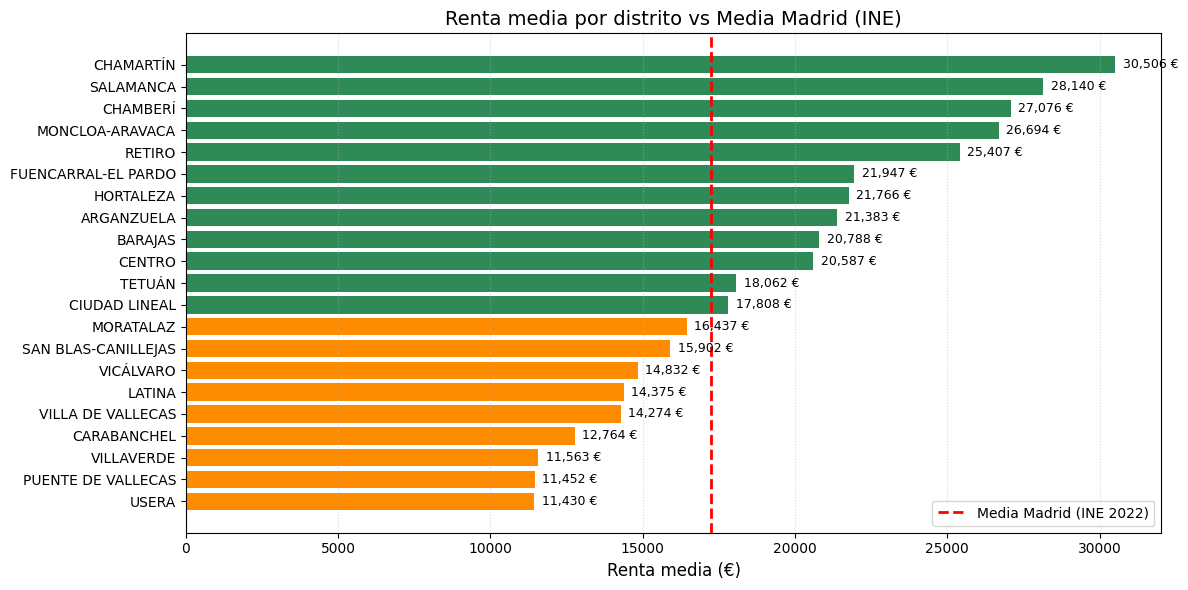

In [70]:

df_renta = pd.read_csv("../Data/renta_media_distrito.csv", sep=";", thousands='.', decimal=',')
df_renta.columns = df_renta.columns.str.strip().str.lower().str.replace(" ", "_")

df_renta["cod_distrito_num"] = df_renta["distritos"].str.extract(r'distrito\s+(\d+)$')[0].astype(float)
df_renta.drop(columns=["municipios", "secciones", "indicadores_de_renta_media_y_mediana", "distritos"],
              inplace=True, errors="ignore")


distrito_map = {
    1: "CENTRO", 2: "ARGANZUELA", 3: "RETIRO", 4: "SALAMANCA", 5: "CHAMARTÍN",
    6: "TETUÁN", 7: "CHAMBERÍ", 8: "FUENCARRAL-EL PARDO", 9: "MONCLOA-ARAVACA",
    10: "LATINA", 11: "CARABANCHEL", 12: "USERA", 13: "PUENTE DE VALLECAS",
    14: "MORATALAZ", 15: "CIUDAD LINEAL", 16: "HORTALEZA", 17: "VILLAVERDE",
    18: "VILLA DE VALLECAS", 19: "VICÁLVARO", 20: "SAN BLAS-CANILLEJAS", 21: "BARAJAS"
}
df_renta["distrito_name"] = df_renta["cod_distrito_num"].map(distrito_map)


df_renta_limpio = df_renta[["distrito_name", "total"]].dropna()
df_renta_limpio.columns = ["distrito", "renta_media"]


df_renta_limpio["renta_media"] = (
    df_renta_limpio["renta_media"]
    .astype(str)
    .str.replace(r"[^\d\.]", "", regex=True)  
    .str.replace(".", "", regex=False)        
    .astype(float)
)


df_renta_limpio = df_renta_limpio.sort_values("renta_media", ascending=True)

# renta media Madrid 2022 ( INE)
renta_ine = 17225  

# colores
colors = df_renta_limpio["renta_media"].apply(
    lambda x: "seagreen" if x > renta_ine else "darkorange"
)


plt.figure(figsize=(12, 6))
bars = plt.barh(df_renta_limpio["distrito"], df_renta_limpio["renta_media"], color=colors)
plt.axvline(renta_ine, color='red', linestyle='--', linewidth=2, label="Media Madrid (INE 2022)")


for bar in bars:
    width = bar.get_width()
    plt.text(width + 250, bar.get_y() + bar.get_height() / 2,
             f"{int(width):,} €", va='center', fontsize=9)


plt.xlabel("Renta media (€)", fontsize=12)
plt.title("Renta media por distrito vs Media Madrid (INE)", fontsize=14)
plt.legend()
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()


plt.savefig("renta_distritos.png", dpi=300)
plt.show()

In [77]:
print(df_distritos_sorted.columns.tolist())

['cod_distrito', 'distrito', 'periodo', 'total renta media', 'punto_limpio_fijo']


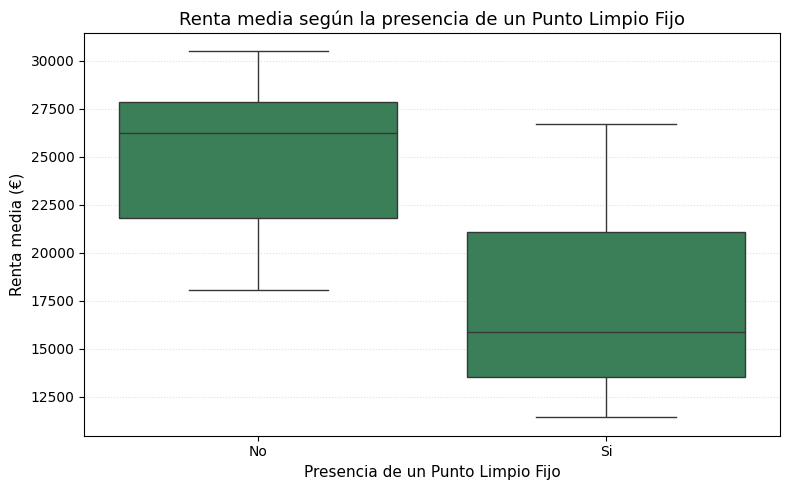

In [116]:
# hay algun relacion entre la renta media y la presencia de un PLF?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))


sns.boxplot(
    data=df_distritos_sorted,
    x="punto_limpio_fijo",
    y="total renta media",
    color="seagreen"  
)

plt.title("Renta media según la presencia de un Punto Limpio Fijo", fontsize=13)
plt.xlabel("Presencia de un Punto Limpio Fijo", fontsize=11)
plt.ylabel("Renta media (€)", fontsize=11)
plt.grid(True, axis='y', linestyle=':', alpha=0.4)
plt.tight_layout()

plt.savefig("renta_vs_punto_limpio.png", dpi=300)
plt.show()




In [79]:
print(df_renta.columns)

Index(['periodo', 'total', 'cod_distrito_num', 'distrito_name'], dtype='object')


In [81]:
import plotly.express as px

fig = px.box(df_distritos_sorted,
             x="punto_limpio_fijo",
             y="total renta media",
             
             title="Renta media segun la presencia de un punto limpio",
             labels={"presencia de un punto limpio": "Punto Limpio ?", "renta_media": "Renta media (€)"})
fig.update_layout(title_x=0.5)
fig.show()

In [85]:
#hacemos un test Mann_Whitney U para comparar los dos grupos
from scipy.stats import mannwhitneyu

renta_sin_pl = df_distritos_sorted[df_distritos_sorted["punto_limpio_fijo"]== "No"]["total renta media"]
renta_con_pl = df_distritos_sorted[df_distritos_sorted["punto_limpio_fijo"]== "No"]["total renta media"]

stat, p_value= mannwhitneyu(renta_sin_pl, renta_con_pl, alternative='two-sided')

print(f"Stat U= {stat}")
print(f"Value p= {p_value:.4f}")

alpha = 0.5
if p_value<alpha:
    print("diferencia importante: la renta media varia segun la presencia de un punto limpio fijo")
else: 
    print("no diferencia importante detectada")

Stat U= 18.0
Value p= 1.0000
no diferencia importante detectada


##  Resultados preliminares: ¿Existe una relación entre renta y acceso?

Los cálculos realizados hasta ahora sugieren que **no existe un vínculo directo** entre el nivel de renta de los distritos y la presencia de un Punto Limpio Fijo en su territorio.

Aunque inicialmente se podía suponer que los barrios con mayores ingresos dispondrían de más infraestructuras, los datos muestran una distribución que **no sigue un patrón socioeconómico evidente** a nivel distrital.

 Esto nos lleva a profundizar el análisis en una escala más fina y significativa: **el nivel de los barrios**.

### Próximo paso

A continuación, exploramos la distribución de renta y de puntos limpios a escala de barrio (`barrios`), con el objetivo de identificar posibles desigualdades más localizadas que podrían quedar ocultas a nivel de distrito.

In [86]:
#Distancia del PLP mas cerca
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

pl= pd.read_csv('/Users/pm/Desktop/Punto Limpio Python/Data/puntos_limpios_clean', sep=";")
gdf_pl = gpd.GeoDataFrame(pl, geometry=gpd.points_from_xy(pl["longitud"], pl["latitud"]), crs="EPSG:4326")

<Axes: >

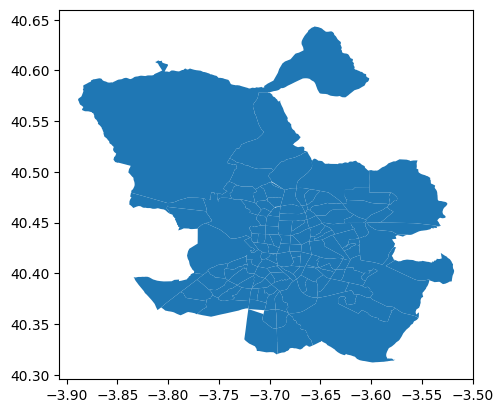

In [87]:
gdf_barrios = gpd.read_file("../Data/Barrios.json")
gdf_barrios["centroid"]= gdf_barrios.centroid.y
gdf_barrios["lon"]= gdf_barrios.centroid.x

gdf_barrios.head()
gdf_barrios.plot()

In [88]:
print(gdf_barrios.columns)

Index(['id', 'Shape_Leng', 'Shape_Area', 'CODDIS', 'COD_DIS_TX', 'NOMDIS',
       'COD_BAR', 'COD_DISBAR', 'COD_DISB', 'NUM_BAR', 'NOMBRE', 'BARRIO_MAY',
       'BARRIO_MT', 'FCH_ALTA', 'FCH_BAJA', 'OBSERVACIO', 'APROBACION',
       'geometry', 'centroid', 'lon'],
      dtype='object')


In [89]:
print(gdf_barrios.crs)

None


## Carga y limpieza del shapefile de barrios de Madrid

Para poder realizar análisis espaciales sobre la ciudad de Madrid, hemos cargado el archivo shapefile correspondiente a la división oficial de los barrios. Posteriormente, hemos realizado una limpieza de las columnas innecesarias para dejar sólo la información útil para el análisis.

###  Carga del shapefile

Utilisamos la librería `geopandas` para leer el fichero `.shp` ubicado en el directorio `../Data/Barrios/` :

In [90]:
import geopandas as gpd
gdf_barrios = gpd.read_file("../Data/Barrios/BARRIOS.shp")
gdf_barrios.columns = gdf_barrios.columns.str.lower().str.strip()
columns_to_delete = [
    "fch_alta", "fch_baja", "observacio", "aprobacion",
    "shape_area", "shape_leng",  
    "cod_dis_tx", "cod_disbar", "cod_disb",  
    "num_bar", "barrio_may", "barrio_mt"     
]

gdf_barrios.drop(columns=columns_to_delete, inplace=True, errors="ignore")
gdf_barrios.head()


,coddis,nomdis,cod_bar,nombre,geometry
0,1,Centro,011,Palacio,"POLYGON ((440112.785 4474645.921, 440078.075 4..."
1,1,Centro,012,Embajadores,"POLYGON ((440277.382 4473980.839, 440368.002 4..."
2,1,Centro,013,Cortes,"POLYGON ((440780.52 4474528.375, 440907.759 44..."
3,1,Centro,014,Justicia,"POLYGON ((440991.949 4474492.423, 440907.759 4..."
4,1,Centro,015,Universidad,"POLYGON ((440517.952 4474758.368, 440476.812 4..."


In [91]:
# # Cálculo de los centroides de los barrios

# Para representar o analizar cada barrio con un único punto de referencia, hemos calculado el **centroide geométrico** de cada polígono 
# que representa un barrio.

# #Cálculo del centroide

# Se añade una nueva columna llamada `centroide` que contiene el punto central de cada geometría de barrio :
gdf_barrios["centroide"] = gdf_barrios.geometry.centroid
#gdf_barrios.head()
gdf_barrios["centroide"].apply(lambda x: isinstance(x, Point)).value_counts()

centroide
True    131
Name: count, dtype: int64

In [92]:
import pandas as pd

pl_clean = pd.read_csv("/Users/pm/Desktop/Punto Limpio Python/Data/puntos_limpios_clean", sep=";")
columns_to_delete = ["transporte", "descripcion", "nombre_via", "clase_vial", "num", "orientacion", "codigo_postal", "latitud", "longitud"]
gdf_pl.drop(columns=columns_to_delete, inplace=True, errors="ignore")
columns_to_keep = ["pk", "nombre", "cod_barrio", "barrio", "cod_distrito", "distrito", "coordenada_x", "coordenada_y", "geometry"]
gdf_pl = gdf_pl[columns_to_keep]

import geopandas as gpd
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(pl_clean["coordenada_x"], pl_clean["coordenada_y"])]
gdf_pl = gpd.GeoDataFrame(pl_clean, geometry=geometry, crs="EPSG:25830")
print(gdf_pl.head())

       pk                                             nombre  \
0   19960  Punto Limpio Fijo del Ayuntamiento de Madrid. ...   
1  138166  Punto Limpio Fijo del Ayuntamiento de Madrid. ...   
2  135224  Punto Limpio Fijo del Ayuntamiento de Madrid. ...   
3   13893  Punto Limpio Fijo del Ayuntamiento de Madrid. ...   
4   43200  Punto Limpio Fijo del Ayuntamiento de Madrid. ...   

                                         transporte  \
0  Metro: Méndez Álvaro (línea 6)Bus: 148, 102, 152   
1            Metro: Barajas (línea 8)Bus: 105 , 115   
2                               Bus: 47 , 108 , 118   
3                             Bus: 7 , 11 , 40 , 52   
4                                     Bus: 70 , 106   

                                         descripcion         nombre_via  \
0  El traslado de residuos correrá a cuenta de la...  ESTRELLA DENEBOLA   
1  El traslado de residuos correrá a cuenta de la...           ALHAURIN   
2  El traslado de residuos correrá a cuenta de la...       

In [93]:
#analisamos la distancia del punto limpio en cada distrito
gdf_barrios = gdf_barrios.to_crs(epsg=25830)
gdf_pl = gdf_pl.to_crs(epsg=25830)
gdf_barrios["centroide"] = gdf_barrios.geometry.centroid
sindex_pl = gdf_pl.sindex

from shapely.geometry import Point

def get_nearest_distance(centroid, sindex, target_gdf):
    idx = list(sindex.nearest(centroid, 1))[0]  
    nearest_geom = target_gdf.iloc[idx].geometry
    return centroid.distance(nearest_geom)

#Aplicamos a cada barrio
gdf_barrios["distance_m_nearest_pl"] = gdf_barrios["centroide"].apply(
    lambda x: get_nearest_distance(x, sindex=sindex_pl, target_gdf=gdf_pl)
)
#Resultados
gdf_barrios[["nombre", "distance_m_nearest_pl"]].sort_values(by="distance_m_nearest_pl", ascending=False)
gdf_barrios["distance_km_nearest_pl"] = round(gdf_barrios["distance_m_nearest_pl"] / 1000, 2)
gdf_barrios.head()

,coddis,nomdis,cod_bar,nombre,geometry,centroide,distance_m_nearest_pl,distance_km_nearest_pl
0,1,Centro,011,Palacio,"POLYGON ((440112.785 4474645.921, 440078.075 4...",POINT (439417.791 4474110.875),3456.540231,3.46
1,1,Centro,012,Embajadores,"POLYGON ((440277.382 4473980.839, 440368.002 4...",POINT (440397.177 4473417.211),2259.881249,2.26
2,1,Centro,013,Cortes,"POLYGON ((440780.52 4474528.375, 440907.759 44...",POINT (440880.152 4474035.578),2427.222175,2.43
3,1,Centro,014,Justicia,"POLYGON ((440991.949 4474492.423, 440907.759 4...",POINT (440900.762 4475014.208),3300.693073,3.30
4,1,Centro,015,Universidad,"POLYGON ((440517.952 4474758.368, 440476.812 4...",POINT (440020.848 4475244.247),3906.761667,3.91


In [94]:
#renta per barrio . limpieza
df_renta_barrio = pd.read_csv(
    "/Users/pm/Desktop/Punto Limpio Python/Data/renta_barrio_madrid.csv",
    sep=";", encoding="utf_8", header=None, skiprows=1
)


df_renta_barrio = df_renta_barrio.iloc[1:, [0, 2]]
df_renta_barrio.columns = ["barrio", "renta_media_hogar"]


df_renta_barrio[['cod_bar', 'nombre']] = df_renta_barrio['barrio'].str.strip().str.split('.', n=1, expand=True)

#Limpieza
df_renta_barrio['cod_bar'] = df_renta_barrio['cod_bar'].str.strip().str.zfill(3)
df_renta_barrio['nombre'] = df_renta_barrio['nombre'].str.strip()


df_renta_barrio['renta_media_hogar'] = df_renta_barrio['renta_media_hogar'].astype(str).str.replace('.', '', regex=False)
df_renta_barrio['renta_media_hogar'] = pd.to_numeric(df_renta_barrio['renta_media_hogar'], errors='coerce')


df_renta_barrio = df_renta_barrio[['cod_bar', 'nombre', 'renta_media_hogar']]


df_renta_barrio.head(5)

,cod_bar,nombre,renta_media_hogar
1,012,Embajadores,34442
2,013,Cortes,43506
3,014,Justicia,52836
4,015,Universidad,41422
5,016,Sol,39077


In [95]:
#clasificacion de los barrios segun la distancia de un punto limpio
distancia_barrio_pl = gdf_barrios[["nombre", "distance_km_nearest_pl"]].sort_values(by="distance_km_nearest_pl", ascending=False)
display(distancia_barrio_pl.head(10))

,nombre,distance_km_nearest_pl
43,El Pardo,18.85
50,El Goloso,15.43
56,El Plantío,14.33
127,Aeropuerto,13.61
128,Casco Histórico de Barajas,12.31
117,El Cañaveral,11.60
49,Mirasierra,11.57
48,Valverde,11.56
105,Valdefuentes,11.55
55,Valdemarín,11.46


In [96]:
# no podemos dejar los NaN en la tabla, asi que cambiamos les NaN por datos nuevos segun los datos de barrios similares
df_renta_barrio["nombre"] = df_renta_barrio["nombre"].str.strip().str.upper()


df_renta_barrio["renta_media_hogar"] = df_renta_barrio.apply(
    lambda row: renta_complemento[row["nombre"]]
    if pd.isna(row["renta_media_hogar"]) and row["nombre"] in renta_complemento
    else row["renta_media_hogar"],
    axis=1
)

df_renta_barrio.tail(70)

,cod_bar,nombre,renta_media_hogar
61,104,ALUCHE,35835
62,105,CAMPAMENTO,36950
63,106,CUATRO VIENTOS,41289
64,107,LAS ÁGUILAS,35324
65,111,COMILLAS,33931
...,...,...,...
126,211,ALAMEDA DE OSUNA,60255
127,212,AEROPUERTO,30541
128,213,CASCO HISTÓRICO DE BARAJAS,35398
129,214,TIMÓN,47816


In [97]:
df_renta_barrio["nombre"] = df_renta_barrio["nombre"].str.strip().str.upper()
df_renta_barrio.columns = df_renta_barrio.columns.str.strip().str.lower()
gdf_barrios["nombre"] = gdf_barrios["nombre"].str.strip().str.upper()

# fusion de datos segun en nombre de barrio
df_rating = gdf_barrios.merge(
    df_renta_barrio[["nombre", "renta_media_hogar"]],
    on="nombre",
    how="left"
)

# eleccion de las columnas finales
df_rating_final = df_rating[["cod_bar", "nombre", "renta_media_hogar", "distance_km_nearest_pl"]]

#  por distancia desc
df_rating_final = df_rating_final.sort_values(by="distance_km_nearest_pl", ascending=False)


display(df_rating_final.tail(5))
df_rating_final.info()


,cod_bar,nombre,renta_media_hogar,distance_km_nearest_pl
14,032,ADELFAS,53793.0,1.10
13,031,PACÍFICO,49420.0,0.96
9,024,LEGAZPI,59963.0,0.90
10,025,DELICIAS,48099.0,0.66
12,027,ATOCHA,52252.0,0.41


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 43 to 12
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cod_bar                 131 non-null    object 
 1   nombre                  131 non-null    object 
 2   renta_media_hogar       121 non-null    float64
 3   distance_km_nearest_pl  131 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.1+ KB


In [98]:
# verificamos si queda NaN
df_renta_barrio["renta_media_hogar"].isna().sum()

np.int64(0)

In [99]:
# indice renta distancia de un pl

# columnas utiles
df_indice = df_rating_final[["nombre", "renta_media_hogar", "distance_km_nearest_pl"]].copy()

# eliminacion de las columnas 
df_indice = df_indice.dropna()

# calular el indice combinado, indice elevado = barrio "favorisado" cerca de un punto limpio y renta bueno
df_indice["indice_acces_equitable"] = (df_indice["renta_media_hogar"] / df_indice["distance_km_nearest_pl"]).round(2)

# resultado
df_indice = df_indice.sort_values(by="indice_acces_equitable", ascending=False)

# 10 primeros resultados
display(df_indice.head(10))

,nombre,renta_media_hogar,distance_km_nearest_pl,indice_acces_equitable
12,ATOCHA,52252.0,0.41,127443.90
10,DELICIAS,48099.0,0.66,72877.27
9,LEGAZPI,59963.0,0.90,66625.56
13,PACÍFICO,49420.0,0.96,51479.17
14,ADELFAS,53793.0,1.10,48902.73
18,NIÑO JESÚS,77820.0,1.88,41393.62
19,RECOLETOS,90258.0,3.18,28383.02
8,CHOPERA,39805.0,1.44,27642.36
15,ESTRELLA,66902.0,2.45,27306.94
7,ACACIAS,52933.0,2.20,24060.45


In [100]:
min_val = df_indice["indice_acces_equitable"].min()
max_val = df_indice["indice_acces_equitable"].max()

print(f"Indice de acceso equitable – min : {min_val}, max : {max_val}")

Indice de acceso equitable – min : 2151.99, max : 127443.9


In [101]:
df_indice = df_indice.sort_values(by="indice_acces_equitable", ascending=True).reset_index(drop=True)
display(df_indice)
df_indice.tail(50)

,nombre,renta_media_hogar,distance_km_nearest_pl,indice_acces_equitable
0,EL PARDO,40565.0,18.85,2151.99
1,AEROPUERTO,30541.0,13.61,2244.01
2,CASCO HISTÓRICO DE BARAJAS,35398.0,12.31,2875.55
3,CASCO HISTÓRICO DE VICÁLVARO,30224.0,8.73,3462.08
4,CAMPAMENTO,36950.0,10.39,3556.30
...,...,...,...,...
116,ADELFAS,53793.0,1.10,48902.73
117,PACÍFICO,49420.0,0.96,51479.17
118,LEGAZPI,59963.0,0.90,66625.56
119,DELICIAS,48099.0,0.66,72877.27


,nombre,renta_media_hogar,distance_km_nearest_pl,indice_acces_equitable
71,OPAÑEL,34030.0,3.43,9921.28
72,ATALAYA,77929.0,7.71,10107.52
73,SAN JUAN BAUTISTA,66728.0,6.44,10361.49
74,GAZTAMBIDE,53100.0,5.12,10371.09
75,HORCAJO,51642.0,4.89,10560.74
76,UNIVERSIDAD,41422.0,3.91,10593.86
77,ORCASUR,31816.0,2.98,10676.51
78,PALOMAS,91071.0,8.41,10828.89
79,ARAPILES,52028.0,4.79,10861.80
80,FONTARRÓN,33443.0,3.06,10929.08


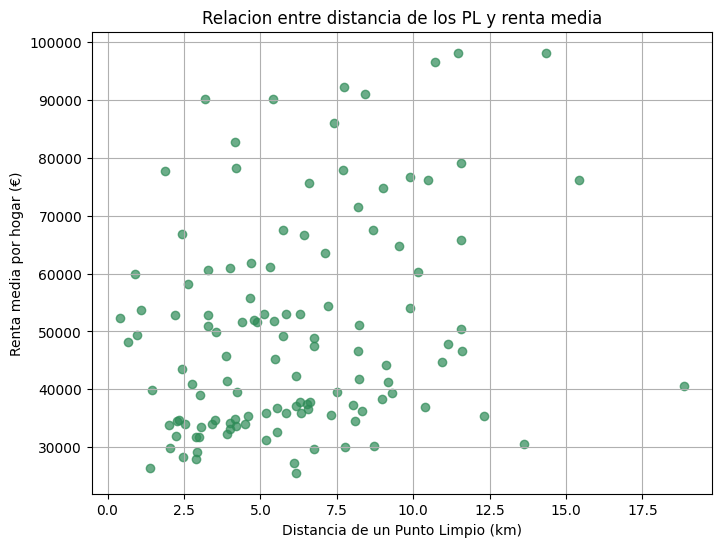

<Figure size 640x480 with 0 Axes>

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(df_indice["distance_km_nearest_pl"], df_indice["renta_media_hogar"], alpha=0.7, color="seagreen" )
plt.xlabel("Distancia de un Punto Limpio (km)")
plt.ylabel("Renta media por hogar (€)")
plt.title("Relacion entre distancia de los PL y renta media")
plt.grid(True)
plt.show()
plt.savefig("distancia pl renta media")

In [103]:
# hacemos un test de corelacion
corr = df_indice["distance_km_nearest_pl"].corr(df_indice["renta_media_hogar"])
print(f"Corelacion distancia ↔ renta: {corr:.3f}")

Corelacion distancia ↔ renta: 0.275


In [104]:
from scipy.stats import pearsonr


df_corr = df_rating_final[["renta_media_hogar", "distance_km_nearest_pl"]].dropna()

# Test de corelacion de Pearson
correlation, p_value = pearsonr(df_corr["renta_media_hogar"], df_corr["distance_km_nearest_pl"])

print("Coefficient de corrélation de Pearson :", round(correlation, 3))
print("P-value :", round(p_value, 4))

Coefficient de corrélation de Pearson : 0.275
P-value : 0.0023


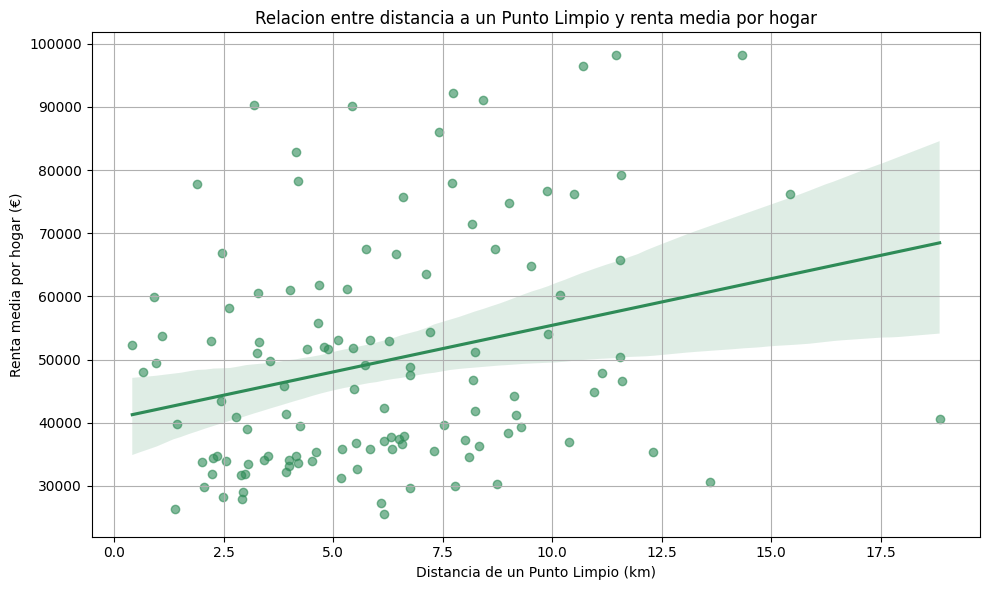

In [117]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_indice,
    x="distance_km_nearest_pl",
    y="renta_media_hogar",
    color="seagreen",
    ci=95,
    scatter_kws={"alpha": 0.6}
)

plt.title("Relacion entre distancia a un Punto Limpio y renta media por hogar")
plt.xlabel("Distancia de un Punto Limpio (km)")
plt.ylabel("Renta media por hogar (€)")
plt.grid(True)
plt.tight_layout()
plt.savefig("relacion_distancia_pl.png", dpi=300)
plt.show()


In [106]:
gdf_barrios['nombre'] = gdf_barrios['nombre'].str.strip().str.upper()
df_rating_final['nombre'] = df_rating_final['nombre'].str.strip().str.upper()

# Fusion
gdf_barrios = gdf_barrios.merge(
    df_rating_final[['nombre', 'renta_media_hogar', 'distance_km_nearest_pl']],
    on='nombre',
    how='left'
)

In [120]:
print(gdf_barrios.columns.tolist())
print(pd.Series(gdf_barrios.columns))


['coddis', 'nomdis', 'cod_bar', 'nombre', 'geometry', 'centroid', 'centroide', 'distance_m_nearest_pl', 'distance_km_nearest_pl_x', 'renta_media_hogar', 'distance_km_nearest_pl_y']
0                       coddis
1                       nomdis
2                      cod_bar
3                       nombre
4                     geometry
5                     centroid
6                    centroide
7        distance_m_nearest_pl
8     distance_km_nearest_pl_x
9            renta_media_hogar
10    distance_km_nearest_pl_y
dtype: object


In [107]:
are_equal = gdf_barrios["distance_km_nearest_pl_x"].equals(gdf_barrios["distance_km_nearest_pl_y"])
print(are_equal)

True


/var/folders/mh/cyn_blp16md9ky8l15xls3gr0000gn/T/ipykernel_16282/3094054239.py:22: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler

/var/folders/mh/cyn_blp16md9ky8l15xls3gr0000gn/T/ipykernel_16282/3094054239.py:22: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



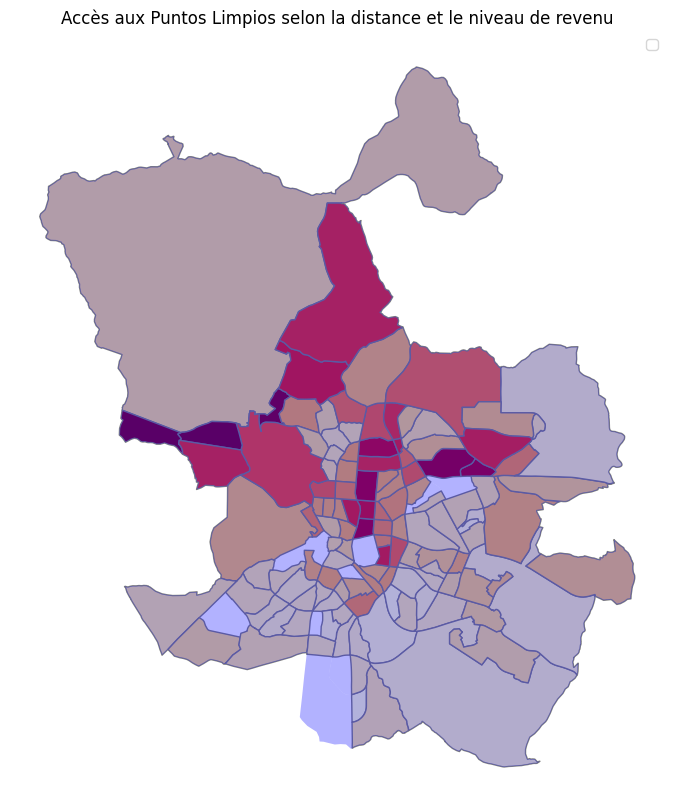

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# mapa con color segun la renta
gdf_barrios.plot(
    column='renta_media_hogar',
    cmap='YlOrRd',
    ax=ax,
    edgecolor='gray'
)

# Circulo segun la distancia y "label"
gdf_barrios.plot(
    ax=ax,
    marker='o',
    markersize=gdf_barrios['distance_km_nearest_pl_x'] * 10,
    color='blue',
    alpha=0.3,
    label='Distancia a PL (escala relativa)'
)

# legenda colocada
plt.legend(loc='upper right')

# Legenda y titulo
plt.title("Accès aux Puntos Limpios selon la distance et le niveau de revenu")
plt.axis('off')
plt.show()


/var/folders/mh/cyn_blp16md9ky8l15xls3gr0000gn/T/ipykernel_998/1582687737.py:32: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



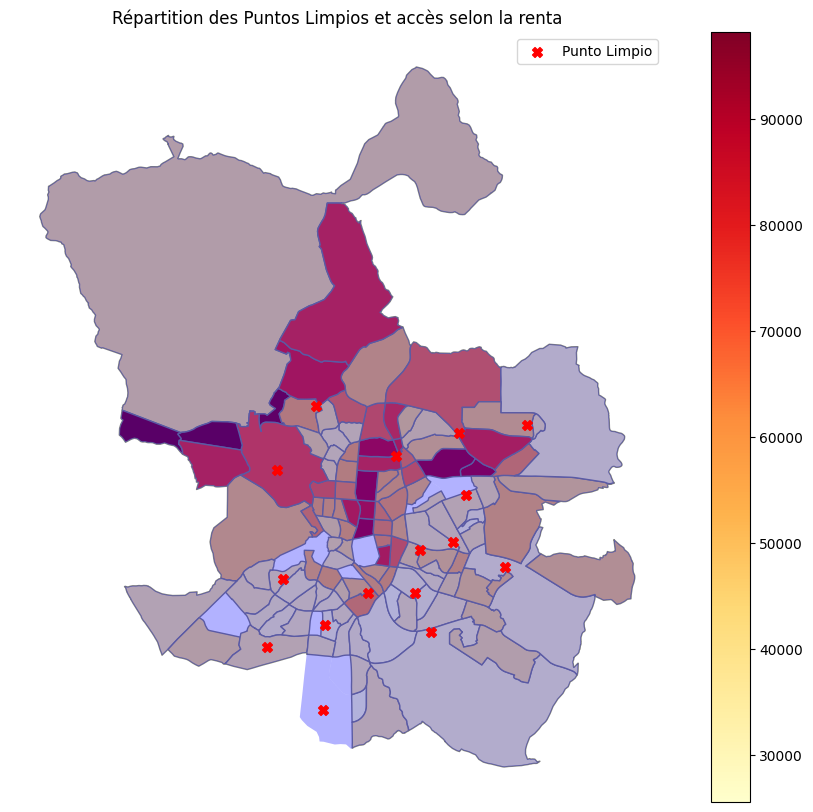

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# mapa con color segun la renta
gdf_barrios.plot(
    column='renta_media_hogar',
    cmap='YlOrRd',
    legend=True,
    ax=ax,
    edgecolor='gray'
)

# Circulo segun la distancia
gdf_barrios.plot(
    ax=ax,
    marker='o',
    markersize=gdf_barrios['distance_km_nearest_pl_x'] * 10,
    color='blue',
    alpha=0.3,
    label='Distancia a PL'
)

# poner los puntos limpios en rojo x
gdf_pl.plot(
    ax=ax,
    color='red',
    markersize=50,
    marker='X',
    label='Punto Limpio'
)

# Legenda y titulo
plt.legend(loc='upper right')
plt.title("Répartition des Puntos Limpios et accès selon la renta")
plt.axis('off')
plt.show()


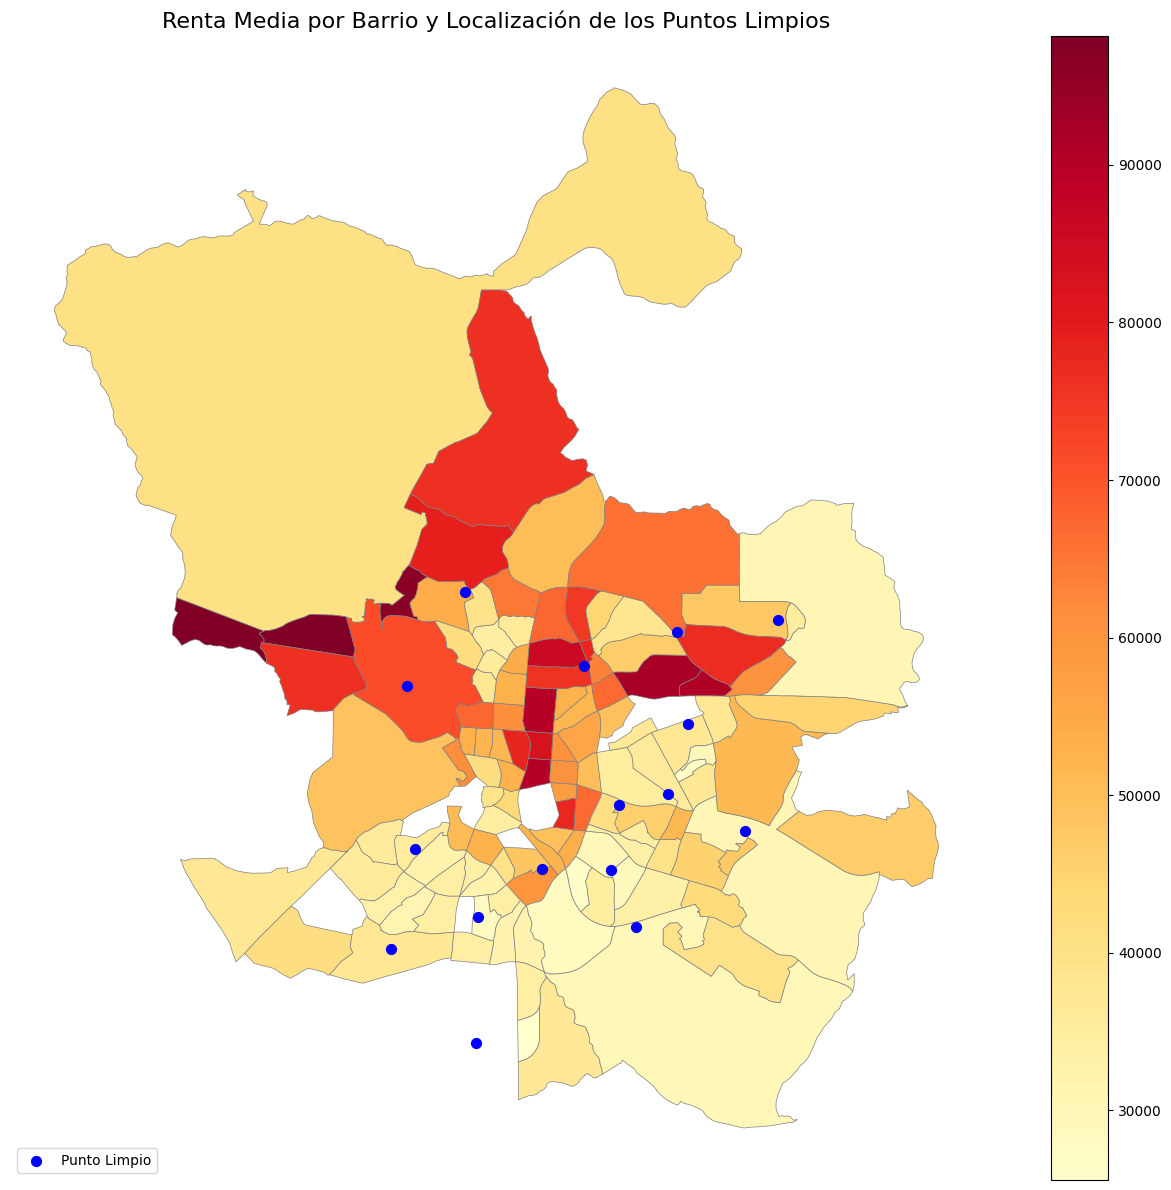

In [ ]:
import matplotlib.pyplot as plt

# figura
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# mapa con color segun la renta
gdf_barrios.plot(
    column='renta_media_hogar',
    cmap='YlOrRd',
    legend=True,
    edgecolor='gray',
    linewidth=0.5,
    ax=ax
)

# poner los puntos limpios
gdf_pl.plot(
    ax=ax,
    color='blue',
    markersize=50,
    label='Punto Limpio'
)

# Titulo 
ax.set_title("Renta Media por Barrio y Localización de los Puntos Limpios", fontsize=16)
ax.set_axis_off()
ax.legend(loc='lower left')

#  salvar la mapa 
plt.tight_layout()
plt.savefig("carte_puntos_limpios.png", dpi=300, bbox_inches='tight')
plt.show()

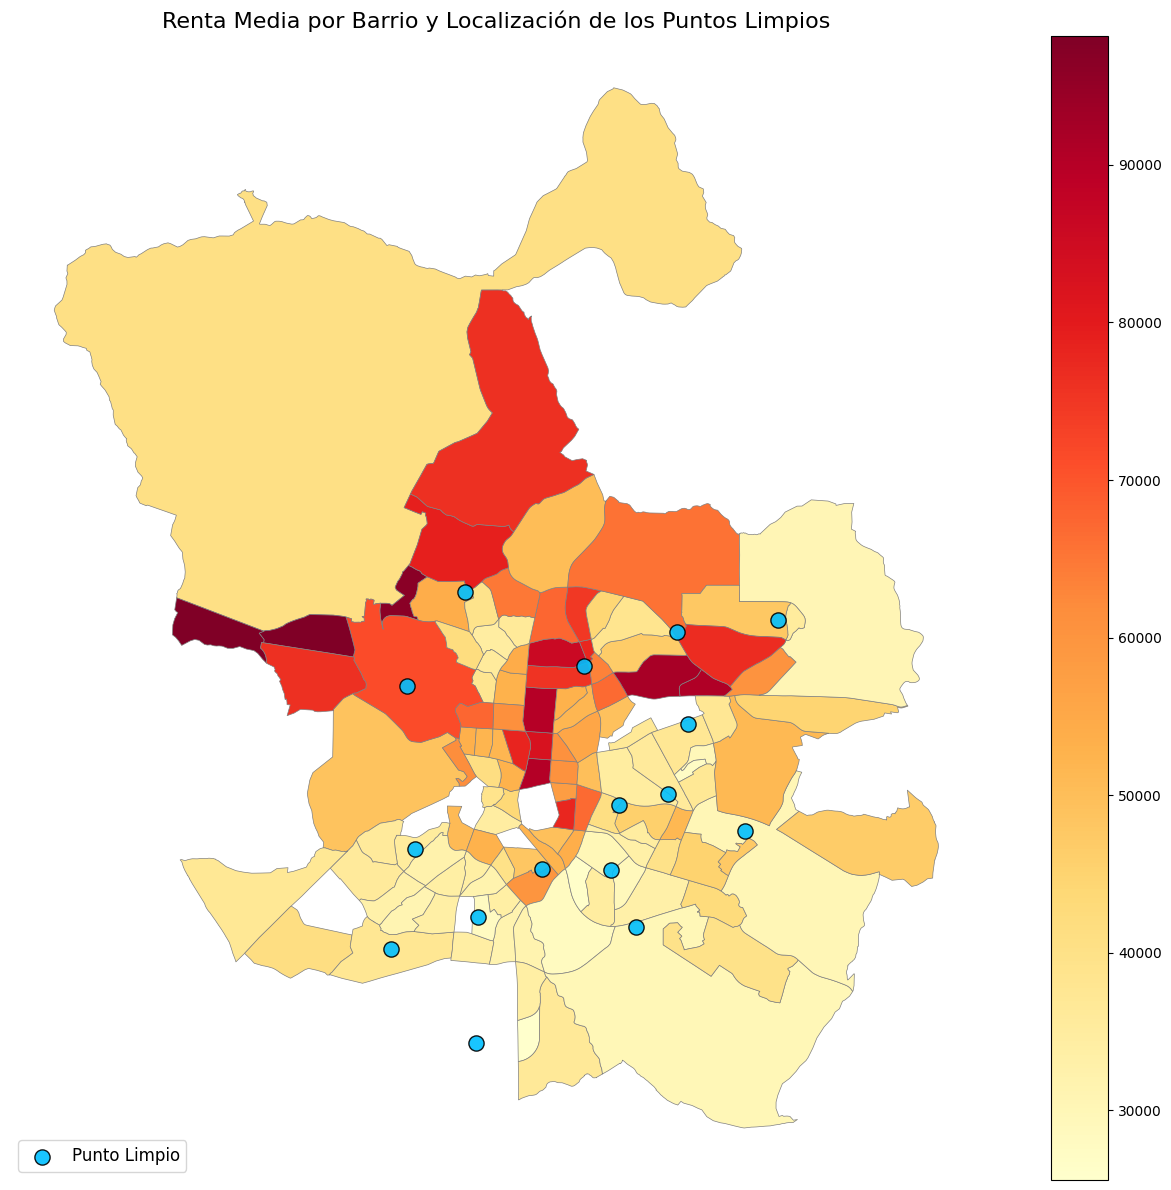

<Figure size 640x480 with 0 Axes>

In [ ]:

# figura
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# mapa con color segun la renta
gdf_barrios.plot(
    column='renta_media_hogar',
    cmap='YlOrRd',
    legend=True,
    edgecolor='gray',
    linewidth=0.5,
    ax=ax
)

# cambiar manera de presentar los puntos limpios
gdf_pl.plot(
    ax=ax,
    color='deepskyblue',         
    edgecolor='black',           
    markersize=120,              
    alpha=0.9,                   
    label='Punto Limpio'
)

# Titulo 
ax.set_title("Renta Media por Barrio y Localización de los Puntos Limpios", fontsize=16)
ax.set_axis_off()
ax.legend(loc='lower left', fontsize=12)

# salvar la mapa 
plt.tight_layout()
plt.savefig("carte_puntos_limpios.png", dpi=300, bbox_inches='tight')
plt.show()
# obtener un png
plt.savefig("pl mapa")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



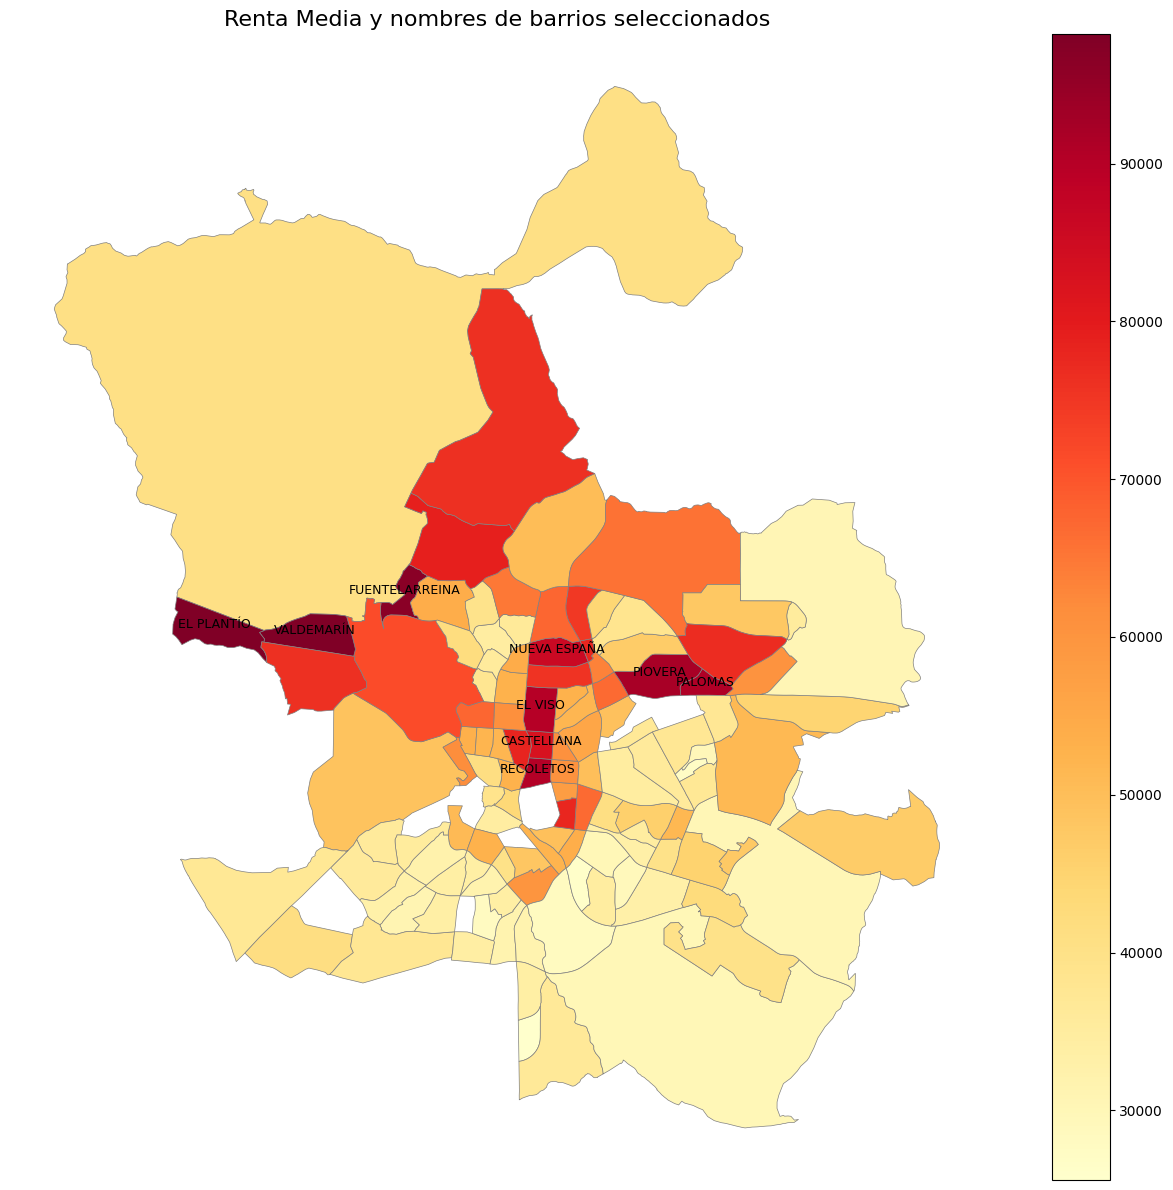

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))

# mapa segun la renta
gdf_barrios.plot(
    column='renta_media_hogar',
    cmap='YlOrRd',
    legend=True,
    edgecolor='gray',
    linewidth=0.5,
    ax=ax
)

# condicion para los nombres que van a aparecer en la mapa renta > 80000)
barrios_visible = gdf_barrios[gdf_barrios['renta_media_hogar'] > 80000]

# cendroid (copy/paste de la mapa precedente)
barrios_visible["centroide"] = barrbios_visible.geometry.centroid

# nombres
for idx, row in barrios_a_afficher.iterrows():
    ax.text(row['centroide'].x, row['centroide'].y, row['nombre'], fontsize=9, ha='center')

# Titulo
ax.set_title("Renta Media y nombres de barrios seleccionados", fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.show()

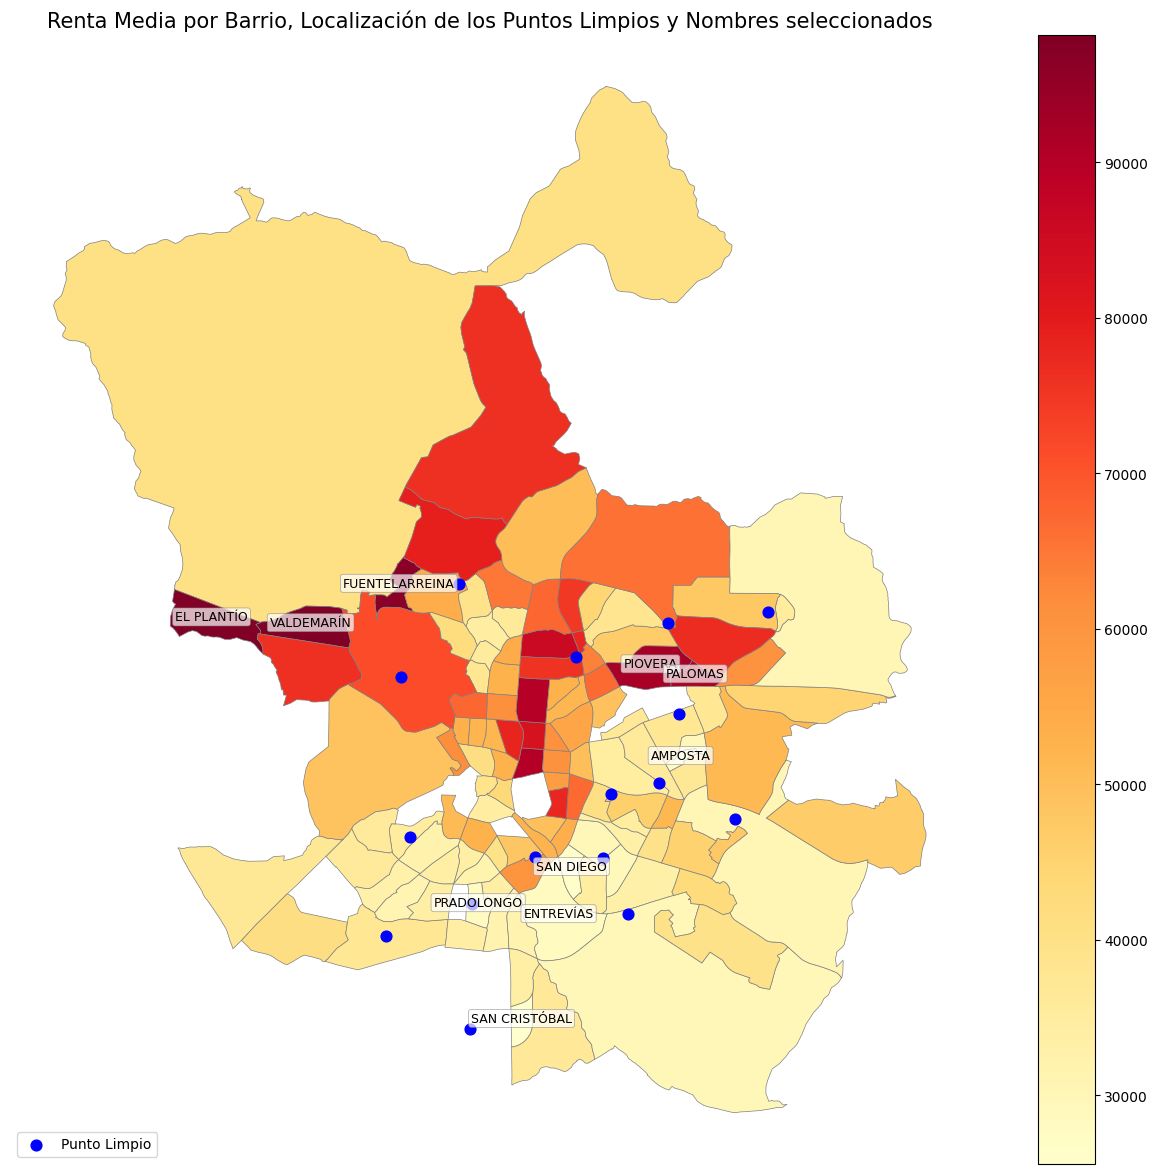

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))

# mapa r
gdf_barrios.plot(
    column='renta_media_hogar',
    cmap='YlOrRd',
    legend=True,
    edgecolor='gray',
    linewidth=0.5,
    ax=ax
)

# anadir los puntos limpios
gdf_pl.plot(
    ax=ax,
    color='blue',
    markersize=60,
    marker='o',
    label='Punto Limpio'
)

# anadir los barrios 
barrios_riches = gdf_barrios.nlargest(5, 'renta_media_hogar')
barrios_pauvres = gdf_barrios.nsmallest(5, 'renta_media_hogar')
barrios_choisis = pd.concat([barrios_riches, barrios_pauvres])

# poner los nombres
barrios_choisis["centroide"] = barrios_choisis.geometry.centroid
for _, row in barrios_choisis.iterrows():
    ax.text(
        row["centroide"].x,
        row["centroide"].y,
        row["nombre"],
        fontsize=9,
        ha='center',
        color="black",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5, alpha=0.7)
    )


ax.set_title("Renta Media por Barrio, Localización de los Puntos Limpios y Nombres seleccionados", fontsize=15)
ax.set_axis_off()
ax.legend(loc='lower left')

plt.tight_layout()
plt.savefig("mapa_final_puntos_limpios.png", dpi=300, bbox_inches='tight')
plt.show()


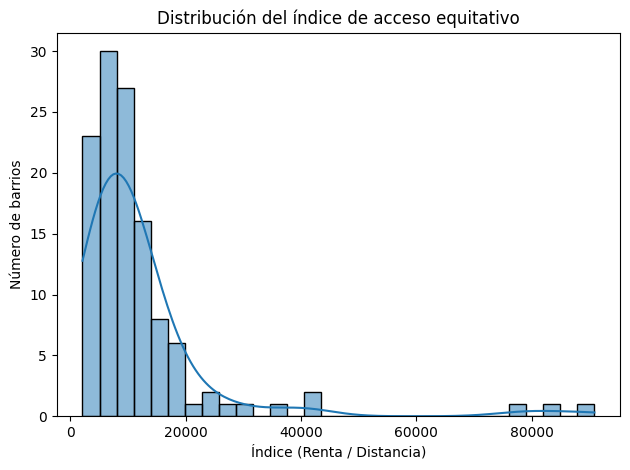

In [168]:
sns.histplot(df_indice["indice_acces_equitable"], bins=30, kde=True)
plt.title("Distribución del índice de acceso equitativo")
plt.xlabel("Índice (Renta / Distancia)")
plt.ylabel("Número de barrios")
plt.tight_layout()
plt.show()

In [169]:
df_top_bottom = pd.concat([
    df_indice.sort_values(by="indice_acces_equitable").head(10),
    df_indice.sort_values(by="indice_acces_equitable").tail(10)
])
display(df_top_bottom)


,nombre,renta_media_hogar,distance_km_nearest_pl,indice_acces_equitable
0,EL PARDO,40565.0,19.00,2135.00
1,AEROPUERTO,30541.0,13.83,2208.32
2,CASCO HISTÓRICO DE BARAJAS,35398.0,12.53,2825.06
3,CASCO HISTÓRICO DE VICÁLVARO,30224.0,8.82,3426.76
4,CAMPAMENTO,36950.0,10.26,3601.36
5,CASCO HISTÓRICO DE VALLECAS,30032.0,7.71,3895.20
6,EL CAÑAVERAL,46641.0,11.73,3976.21
7,REJAS,44801.0,11.15,4018.03
8,PILAR,39383.0,9.47,4158.71
9,PINAR DEL REY,38396.0,9.22,4164.43


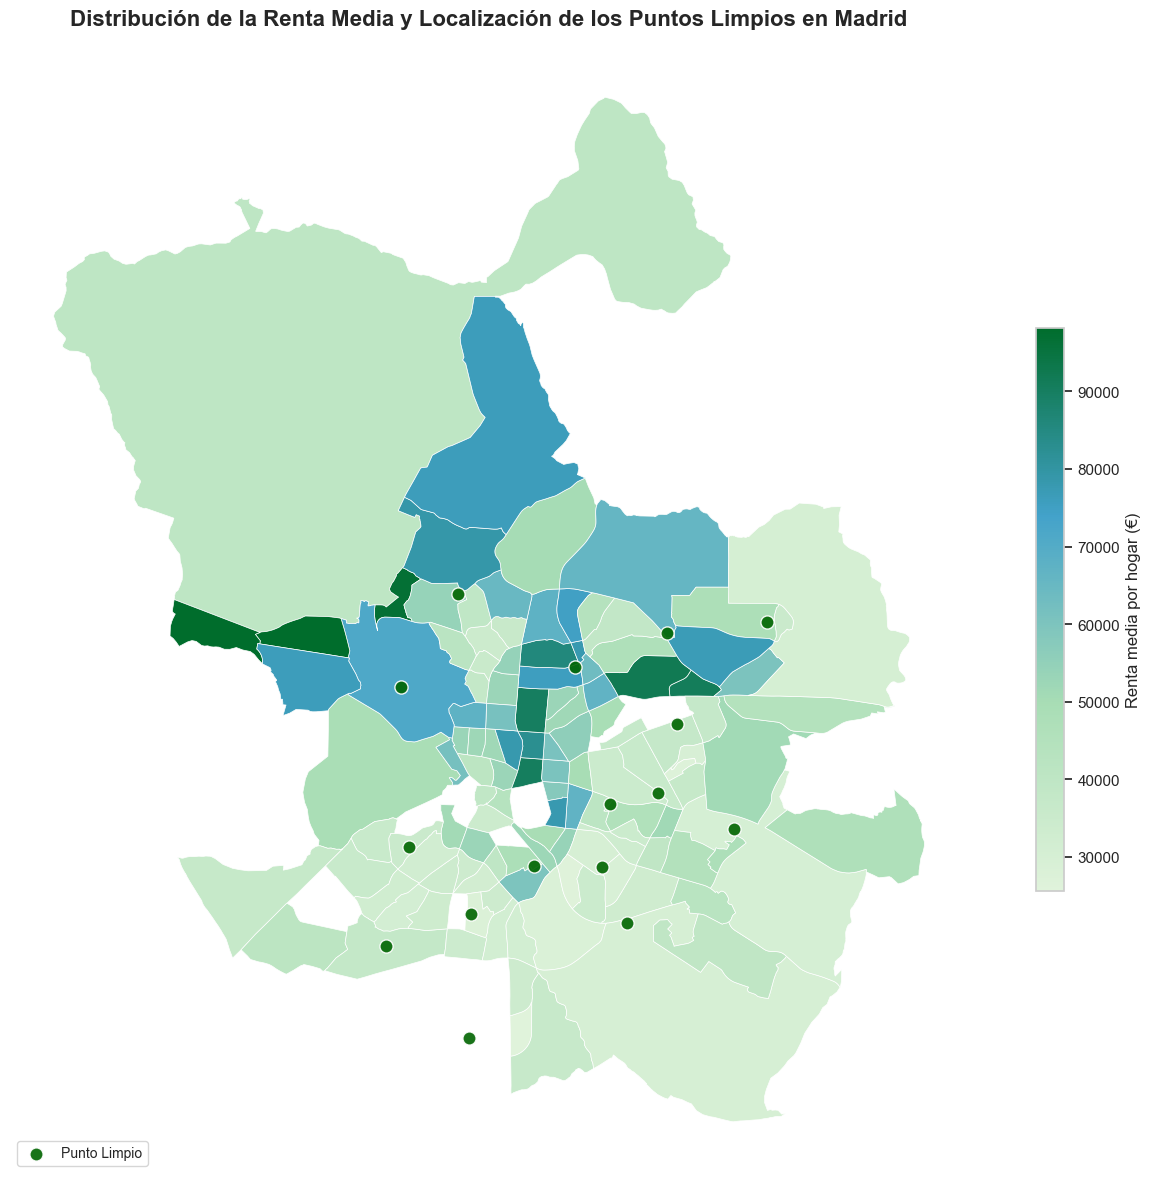

In [242]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Créer la figure
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Palette personnalisée dégradée autour de seagreen
seagreen_palette = mcolors.LinearSegmentedColormap.from_list(
    "seagreen_beige",
    ["#e0f3db", "#a8ddb5", "#43a2ca", "#006d2c"]
)

# Carte des barrios colorée par renta
gdf_barrios.plot(
    column='renta_media_hogar',
    cmap=seagreen_palette,
    legend=True,
    edgecolor='white',
    linewidth=0.5,
    ax=ax,
    legend_kwds={'label': "Renta media por hogar (€)", 'shrink': 0.5}
)

# Ajout des Puntos Limpios avec un fort contraste
gdf_pl.plot(
    ax=ax,
    color='darkgreen',
    edgecolor='white',
    markersize=90,
    marker='o',
    alpha=0.9,
    label='Punto Limpio'
)

# Titre & légende
ax.set_title(
    "Distribución de la Renta Media y Localización de los Puntos Limpios en Madrid",
    fontsize=16,
    fontweight='bold',
    pad=15
)
ax.set_axis_off()
ax.legend(loc='lower left', fontsize=10)

# Sauvegarde
plt.tight_layout()
plt.savefig("mapa_presentacion_puntos_limpios.png", dpi=300, bbox_inches='tight')
plt.show()

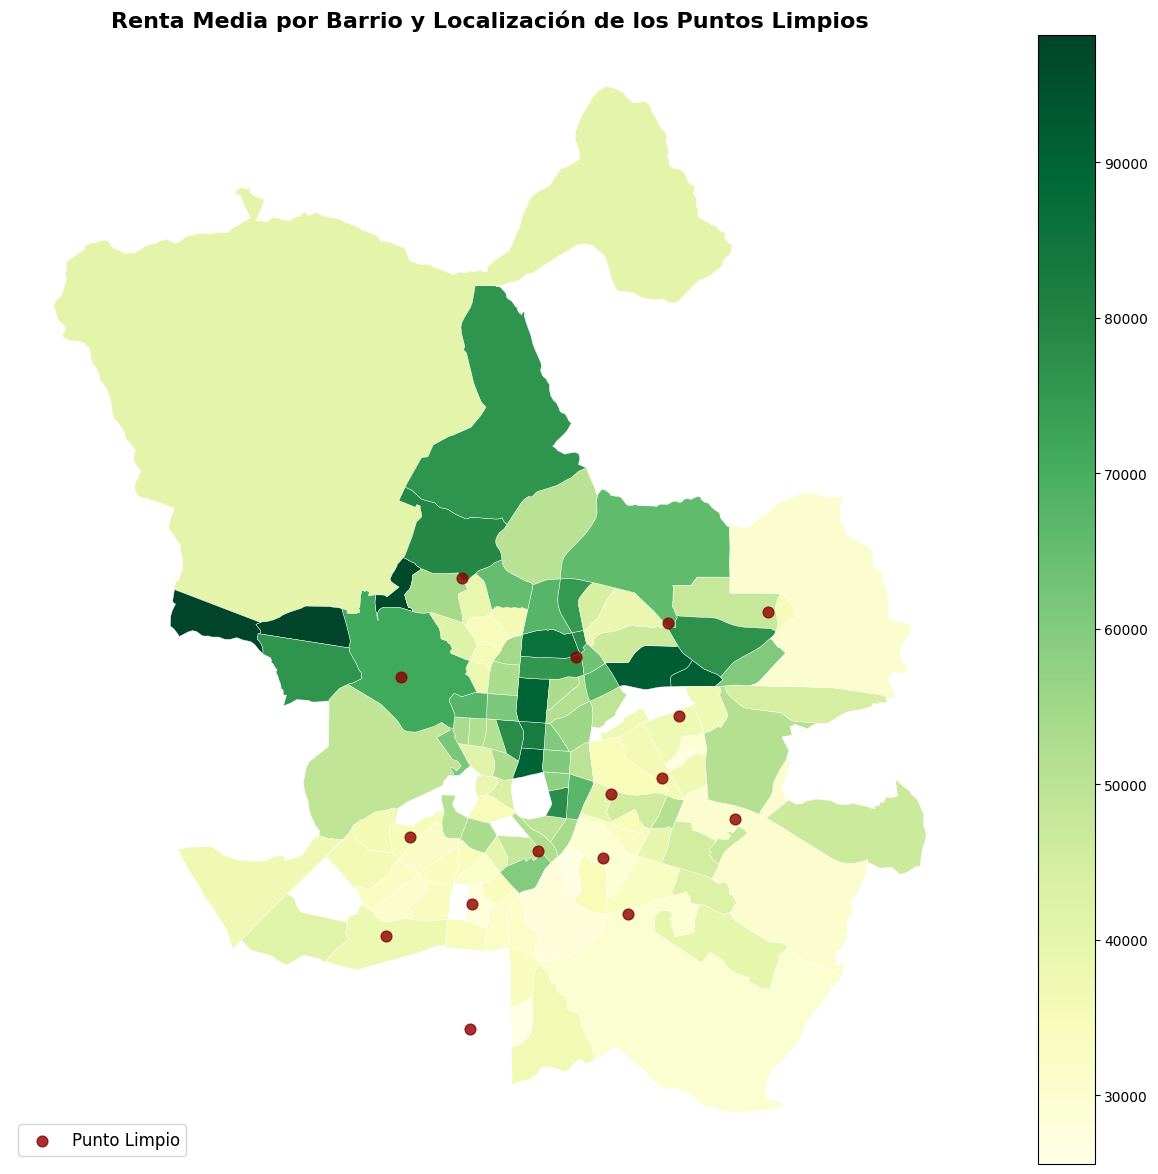

In [119]:
import matplotlib.pyplot as plt

# Création de la figure
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Affichage des barrios colorés selon la renta
gdf_barrios.plot(
    column='renta_media_hogar',
    cmap='YlGn',  # Jaune → Vert
    legend=True,
    edgecolor='white',
    linewidth=0.3,
    ax=ax
)

# Ajout des puntos limpios en rouge foncé
gdf_pl.plot(
    ax=ax,
    color='darkred',
    markersize=60,
    alpha=0.8,
    label='Punto Limpio'
)

# Esthétique
ax.set_title("Renta Media por Barrio y Localización de los Puntos Limpios", fontsize=16, fontweight='bold')
ax.set_axis_off()
ax.legend(loc='lower left', fontsize=12)

# Sauvegarde
plt.tight_layout()
plt.savefig("mapa_renta_puntoslimpios.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/mh/cyn_blp16md9ky8l15xls3gr0000gn/T/ipykernel_16282/2564549913.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



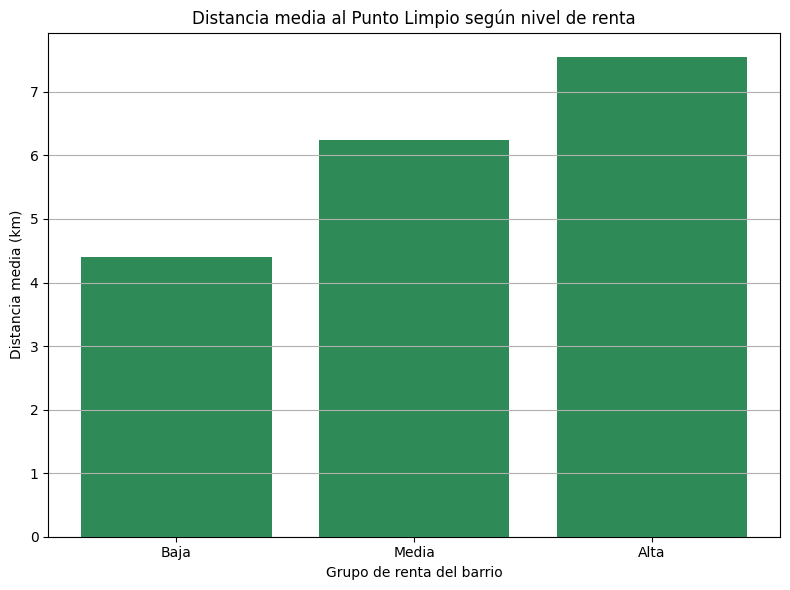

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Création des quartiles de renta
df_rating_final["grupo_renta"] = pd.qcut(
    df_rating_final["renta_media_hogar"],
    q=[0, 0.25, 0.75, 1],
    labels=["Baja", "Media", "Alta"]
)

# Calcul de la distance moyenne pour chaque groupe
df_grouped = df_rating_final.groupby("grupo_renta")["distance_km_nearest_pl"].mean().reset_index()

# Graphique à barres
plt.figure(figsize=(8, 6))
plt.bar(df_grouped["grupo_renta"], df_grouped["distance_km_nearest_pl"], color="seagreen")


plt.title("Distancia media al Punto Limpio según nivel de renta")
plt.xlabel("Grupo de renta del barrio")
plt.ylabel("Distancia media (km)")
plt.grid(axis='y')

plt.tight_layout()
plt.savefig("grafico_distancia_pl.png", dpi=300, bbox_inches='tight')
plt.show()